In [1]:
import pandas as pd
import numpy as np
import time
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.ensemble import RandomForestRegressor
import joblib

# Verificar que la GPU está disponible
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print("GPU disponible.")
else:
    print("GPU no disponible.")


GPU no disponible.


In [2]:
# Crear la carpeta 'resultados' si no existe
if not os.path.exists('resultados'):
    os.makedirs('resultados')

In [3]:
# Cargar los datos
cleaned_data_path = '../datasets/cleaned_data.csv'
data = pd.read_csv(cleaned_data_path)

C:\Users\Ketbome\AppData\Local\Temp\ipykernel_7712\3165875553.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(cleaned_data_path)


In [4]:
data.head()

,ï»¿AGNO,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,...,COD_COM_ALU,NOM_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,SIT_FIN_R,COD_MEN
0,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.6,98,P,P,0
1,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.2,85,P,P,0
2,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.3,86,P,P,0
3,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.3,100,P,P,0
4,2022,1,9,LICEO POLITECNICO ARICA,15,AYP,151,15101,ARICA,151,...,15101,ARICA,400,410,41001,6.7,100,P,P,0


In [5]:
data.describe()

,ï»¿AGNO,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,...,GEN_ALU,FEC_NAC_ALU,COD_REG_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,COD_MEN
count,3092863.0,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,...,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06,3.092863e+06
mean,2022.0,1.165594e+04,4.451590e+00,9.405875e+00,9.599672e+01,9.606289e+03,9.458625e+01,2.844326e+00,1.950878e+00,7.923080e-02,...,1.487296e+00,2.009223e+05,9.477278e+00,9.674496e+03,2.710253e+01,2.844374e+01,2.844879e+03,6.016696e+00,8.791779e+01,1.256763e+06
std,0.0,9.040180e+03,2.880477e+00,4.006076e+00,3.985246e+01,3.988039e+03,3.941338e+01,1.103612e+00,9.592328e-01,2.700987e-01,...,4.998419e-01,5.383089e+02,4.022214e+00,4.004428e+03,1.165727e+02,1.223818e+02,1.224033e+04,6.925039e-01,1.147545e+01,8.217453e+06
min,2022.0,1.000000e+00,0.000000e+00,1.000000e+00,1.100000e+01,1.101000e+03,1.100000e+01,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,1.900010e+05,1.000000e+00,1.101000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,2022.0,4.553000e+03,2.000000e+00,6.000000e+00,6.100000e+01,6.106000e+03,6.100000e+01,2.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,2.007010e+05,6.000000e+00,6.108000e+03,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+00,8.500000e+01,0.000000e+00
50%,2022.0,9.799000e+03,4.000000e+00,1.000000e+01,1.010000e+02,1.010100e+04,9.200000e+01,3.000000e+00,2.000000e+00,0.000000e+00,...,1.000000e+00,2.010020e+05,1.000000e+01,1.010700e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.100000e+00,9.000000e+01,0.000000e+00
75%,2022.0,1.667300e+04,7.000000e+00,1.300000e+01,1.310000e+02,1.312200e+04,1.340000e+02,3.000000e+00,2.000000e+00,0.000000e+00,...,2.000000e+00,2.013020e+05,1.300000e+01,1.312200e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.500000e+00,9.500000e+01,0.000000e+00
max,2022.0,4.213000e+04,9.000000e+00,1.600000e+01,1.630000e+02,1.630500e+04,1.510000e+02,6.000000e+00,5.000000e+00,1.000000e+00,...,2.000000e+00,2.018120e+05,1.600000e+01,1.630500e+04,9.000000e+02,9.100000e+02,9.100500e+04,7.000000e+00,1.000000e+02,7.200700e+07


In [6]:
data.isna().sum()

ï»¿AGNO           0
RBD               0
DGV_RBD           0
NOM_RBD           0
COD_REG_RBD       0
NOM_REG_RBD_A     0
COD_PRO_RBD       0
COD_COM_RBD       0
NOM_COM_RBD       0
COD_DEPROV_RBD    0
NOM_DEPROV_RBD    0
COD_DEPE          0
COD_DEPE2         0
RURAL_RBD         0
ESTADO_ESTAB      0
COD_ENSE          0
COD_ENSE2         0
COD_GRADO         0
LET_CUR           0
COD_JOR           0
COD_TIP_CUR       0
COD_DES_CUR       0
MRUN              0
GEN_ALU           0
FEC_NAC_ALU       0
EDAD_ALU          0
COD_REG_ALU       0
COD_COM_ALU       0
NOM_COM_ALU       0
COD_RAMA          0
COD_SEC           0
COD_ESPE          0
PROM_GRAL         0
ASISTENCIA        0
SIT_FIN           0
SIT_FIN_R         0
COD_MEN           0
dtype: int64

In [7]:
data = data.dropna()

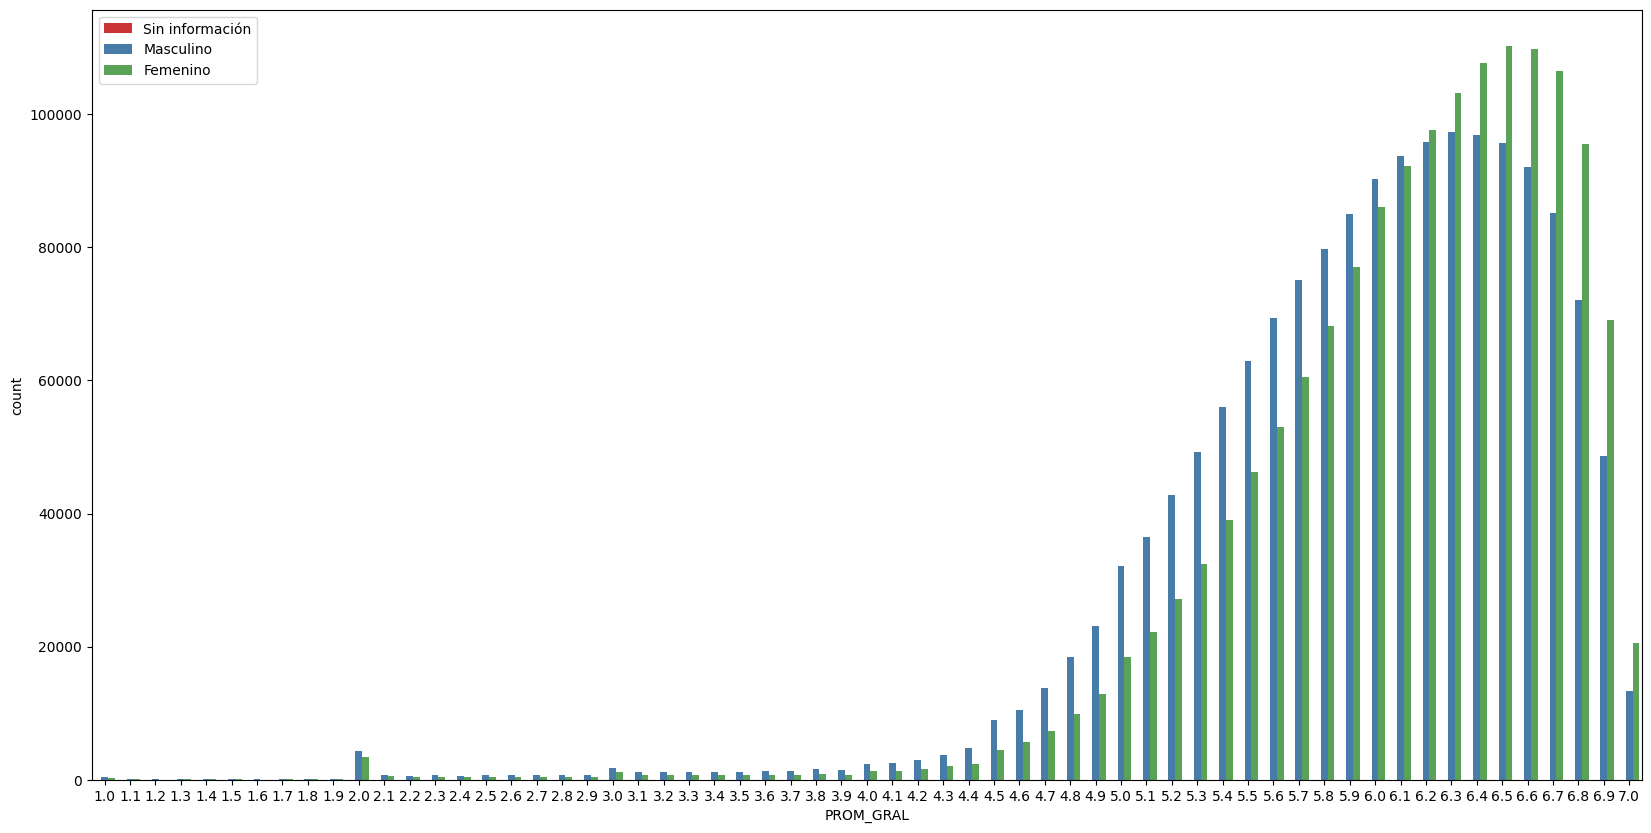

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sb.countplot(x='PROM_GRAL', data=data, hue='GEN_ALU', palette='Set1')
plt.legend(["Sin información", "Masculino", "Femenino"])


In [9]:
# Eliminar columnas sin importancia
col_drop = ['ï»¿AGNO', 'RBD', 'DGV_RBD', 'NOM_RBD', 'NOM_REG_RBD_A', 'COD_COM_RBD', 'NOM_COM_RBD', 'NOM_DEPROV_RBD', 'COD_DEPE', 'ESTADO_ESTAB', 'COD_ENSE', 'COD_ENSE2', 'LET_CUR', 'MRUN', 'FEC_NAC_ALU', 'EDAD_ALU', 'COD_REG_ALU', 'NOM_COM_ALU', 'SIT_FIN_R']
data = data.drop(col_drop, axis=1)

In [10]:
data.head()

,COD_REG_RBD,COD_PRO_RBD,COD_DEPROV_RBD,COD_DEPE2,RURAL_RBD,COD_GRADO,COD_JOR,COD_TIP_CUR,COD_DES_CUR,GEN_ALU,COD_COM_ALU,COD_RAMA,COD_SEC,COD_ESPE,PROM_GRAL,ASISTENCIA,SIT_FIN,COD_MEN
0,15,151,151,5,0,3,4,0,1,1,15101,400,410,41001,6.6,98,P,0
1,15,151,151,5,0,3,4,0,1,1,15101,400,410,41001,6.2,85,P,0
2,15,151,151,5,0,3,4,0,1,2,15101,400,410,41001,6.3,86,P,0
3,15,151,151,5,0,4,4,0,1,2,15101,400,410,41001,6.3,100,P,0
4,15,151,151,5,0,4,4,0,1,2,15101,400,410,41001,6.7,100,P,0


In [11]:
# Dummies hacer los strings en números
dummies_SIT_FIN	 = pd.get_dummies(data['SIT_FIN'], drop_first=True)

data = data.join(dummies_SIT_FIN)
data = data.drop(['SIT_FIN'], axis=1)

<Axes: >

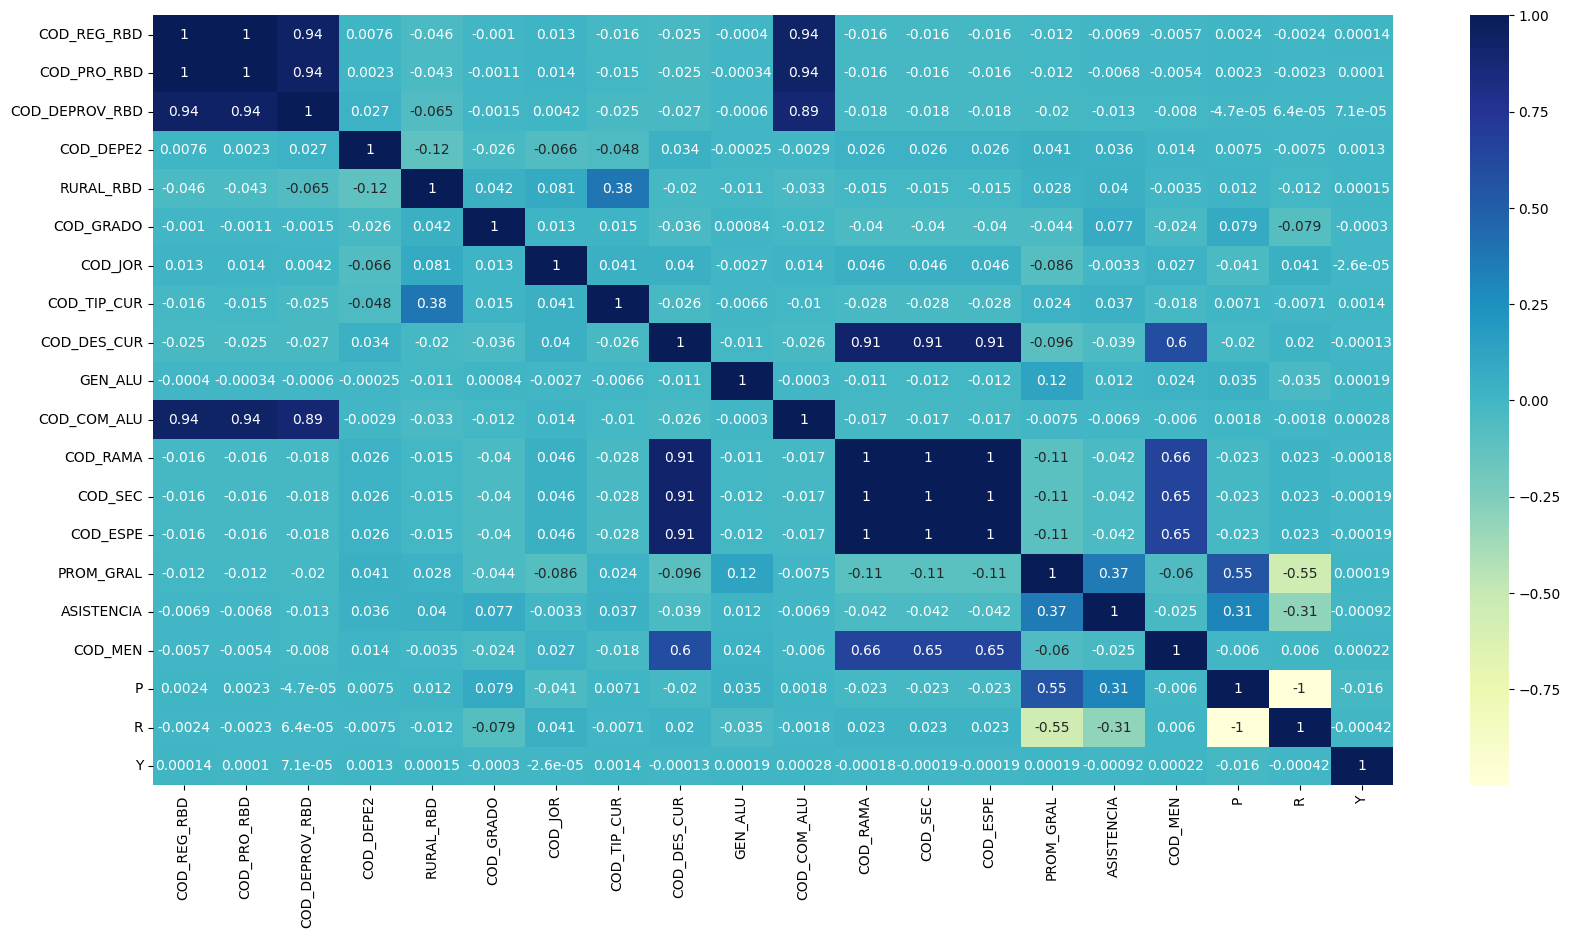

In [12]:
#Observar correlacion para hacer mas limpieza
plt.figure(figsize=(20,10))
sb.heatmap(data.corr(), annot=True, cmap='YlGnBu')


In [13]:
# Ver correlacion en base a valor a evaluar
data.corr()["PROM_GRAL"].sort_values(ascending=False)

PROM_GRAL         1.000000
P                 0.547449
ASISTENCIA        0.365931
GEN_ALU           0.117691
COD_DEPE2         0.041195
RURAL_RBD         0.028171
COD_TIP_CUR       0.023564
Y                 0.000188
COD_COM_ALU      -0.007472
COD_REG_RBD      -0.012076
COD_PRO_RBD      -0.012213
COD_DEPROV_RBD   -0.019578
COD_GRADO        -0.043880
COD_MEN          -0.060024
COD_JOR          -0.085738
COD_DES_CUR      -0.096366
COD_SEC          -0.107000
COD_ESPE         -0.107001
COD_RAMA         -0.107364
R                -0.547592
Name: PROM_GRAL, dtype: float64

In [14]:
# Borrado de columnas que aportan pero son una vista futura
data = data.drop(['P','R', 'Y'], axis=1)

In [15]:
# Borrado de columnas que no aportan
data = data.drop(['COD_TIP_CUR', 'COD_COM_ALU', 'COD_DEPROV_RBD'], axis=1)

In [16]:
data.corr()["PROM_GRAL"].sort_values(ascending=False)

PROM_GRAL      1.000000
ASISTENCIA     0.365931
GEN_ALU        0.117691
COD_DEPE2      0.041195
RURAL_RBD      0.028171
COD_REG_RBD   -0.012076
COD_PRO_RBD   -0.012213
COD_GRADO     -0.043880
COD_MEN       -0.060024
COD_JOR       -0.085738
COD_DES_CUR   -0.096366
COD_SEC       -0.107000
COD_ESPE      -0.107001
COD_RAMA      -0.107364
Name: PROM_GRAL, dtype: float64

In [17]:
num_distinct = data['PROM_GRAL'].nunique()
print("Número de valores distintos en PROM_GRAL:", num_distinct)


Número de valores distintos en PROM_GRAL: 61


In [18]:
# Saber cuantas filas hay
data.shape

(3092863, 14)

In [19]:
# División de datos
X = data.drop(columns=['PROM_GRAL'])
y = data['PROM_GRAL']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [30]:
modelo = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=150, min_samples_split=10, min_samples_leaf=4)

In [107]:
#modelo.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=150, random_state=42)

In [31]:
joblib.dump(modelo, 'randomForest.pkl')

KeyboardInterrupt: 

In [33]:
# Cargar el modelo
modelo = joblib.load('randomForest.pkl')

In [34]:
# Predicción
y_pred = modelo.predict(X_test)

In [35]:
# Métricas de evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.3373477519007086
MAE: 0.44650234409640843
R2: 0.2961241191997185


In [39]:
# Guardar los resultados
results = pd.DataFrame({'Modelo': ['Random Forest'],
                        'MSE': [mse],
                        'MAE': [mae],
                        'R2': [r2]})
results.to_csv('resultados/randomforest.csv', index=False)
